In [1]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.keras import models,layers
from tensorflow.keras import backend
from tensorflow.keras import utils

In [3]:
from tensorflow.keras import datasets

In [4]:
(trainimg,trainlb),(testimg,testlb)=datasets.mnist.load_data()
print(trainimg.shape)
print(trainlb.shape)
print(testimg.shape)
print(testlb.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
import matplotlib.pyplot as plt
print(trainlb[45600])
plt.imshow(trainimg[45600],cmap='gray')
plt.show()

7


<Figure size 640x480 with 1 Axes>

In [6]:
#Scaling images
trainimg=trainimg/255
testimg=testimg/255

In [7]:
#reshape images
trainimg=trainimg.reshape(60000,1,28,28)
testimg=testimg.reshape(10000,1,28,28)

In [8]:
#preprocessing labels - onehot encode labels
trainlb

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
trainlb=utils.to_categorical(trainlb)
testlb=utils.to_categorical(testlb)
print(trainlb.shape)
print(testlb.shape)

(60000, 10)
(10000, 10)


# Convolutional Neural Network

In [10]:
backend.set_image_data_format('channels_first')

In [11]:
#initiating a Neural Network model
model=models.Sequential()

In [12]:
#add the first convolutional layer
model.add(layers.Conv2D(filters=50,kernel_size=(3,3),activation='relu',input_shape=(1,28,28)))

In [13]:
#adding a pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))

In [ ]:
#dropout optimization
model.add(layers.Dropout(0.5))

In [14]:
model.add(layers.Flatten())

In [15]:
#first hidden layer
model.add(layers.Dense(60,activation='relu'))

In [16]:
#add the final output layer
model.add(layers.Dense(10,activation='sigmoid'))

In [17]:
#compile the CNN
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [19]:
model.fit(trainimg,trainlb,verbose=True,epochs=20,batch_size=1000,
         validation_data=[testimg,testlb])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0082 - acc: 0.9975 - val_loss: 0.0108 - val_acc: 0.9963
Epoch 2/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0079 - acc: 0.9977 - val_loss: 0.0110 - val_acc: 0.9962
Epoch 3/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0075 - acc: 0.9978 - val_loss: 0.0113 - val_acc: 0.9962
Epoch 4/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0071 - acc: 0.9979 - val_loss: 0.0109 - val_acc: 0.9961
Epoch 5/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0071 - acc: 0.9979 - val_loss: 0.0106 - val_acc: 0.9964
Epoch 6/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0065 - acc: 0.9981 - val_loss: 0.0102 - val_acc: 0.9964
Epoch 7/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063 - acc: 0.9982 - val_loss: 0.0106 - val_acc

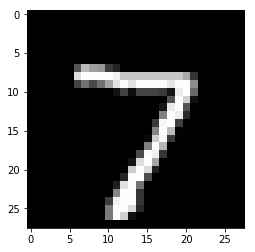

In [20]:
plt.imshow(testimg[0].reshape(28,28),cmap='gray')
plt.show()

In [21]:
model.predict_classes(testimg[0].reshape(1,1,28,28))

array([7], dtype=int64)

In [22]:
model.save('model.h5')

In [23]:
model.save_weights('modelweight.h5')

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 26, 26)        500       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 13, 13)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8450)              0         
_________________________________________________________________
dense (Dense)                (None, 60)                507060    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                610       
Total params: 508,170
Trainable params: 508,170
Non-trainable params: 0
_________________________________________________________________
